# Fake news detection

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read datasets

In [41]:
fake = pd.read_csv("D:/Fake_news/fake-news2/data/Fake.csv")
true = pd.read_csv("D:/Fake_news/fake-news2/data/True.csv")

In [42]:
fake.shape

(23481, 4)

In [43]:
true.shape

(21417, 4)

## Data cleaning and preparation

In [44]:
# Add flag to track fake and real
fake['target'] = 0#'fake'
true['target'] = 1#'true'

In [45]:
# Concatenate dataframes
# Reset the index of the DataFrame, and use the default one instead. 
# If the DataFrame has a MultiIndex, this method can remove one or more levels.
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [46]:
data

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [47]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [48]:
# Check the data
data

,title,text,subject,date,target
0,CATHOLICS SHOULD BE Singing Donald Trump’s Pra...,Rush Limbaugh was cheering for Trump and how h...,left-news,"Oct 20, 2016",0
1,"Melissa Harris-Perry Is DONE With MSNBC, Pens...","As you may or may not know at this point, MSNB...",News,"February 26, 2016",0
2,"U.N. decries Israel's killing of Gaza amputee,...",GENEVA (Reuters) - A senior U.N. official said...,worldnews,"December 19, 2017",1
3,PRESIDENTIAL? Trump Used Influence To Vouch F...,When Donald Trump launched his presidential ca...,News,"February 16, 2016",0
4,“ONE OF THE CORRUPT WOMEN IN CONGRESS” Says De...,That has been a problem with our party. When ...,left-news,"Dec 27, 2016",0
...,...,...,...,...,...
44893,A Van Struck Down Muslims In London,A horrifying incident took place in the early ...,News,"June 19, 2017",0
44894,Honduran leader Hernandez declares himself vic...,TEGUCIGALPA (Reuters) - Honduran President Jua...,worldnews,"November 27, 2017",1
44895,"Scranton, Pennsylvania to sell sewer utility f...",(Reuters) - The financially distressed city of...,politicsNews,"March 29, 2016",1
44896,Thousands of Tunisians protest against Trump's...,TUNIS (Reuters) - Thousands of Tunisians prote...,worldnews,"December 7, 2017",1


In [49]:
# Removing the date 
data.drop(["date"], axis=1, inplace=True)
data.head()

,title,text,subject,target
0,CATHOLICS SHOULD BE Singing Donald Trump’s Pra...,Rush Limbaugh was cheering for Trump and how h...,left-news,0
1,"Melissa Harris-Perry Is DONE With MSNBC, Pens...","As you may or may not know at this point, MSNB...",News,0
2,"U.N. decries Israel's killing of Gaza amputee,...",GENEVA (Reuters) - A senior U.N. official said...,worldnews,1
3,PRESIDENTIAL? Trump Used Influence To Vouch F...,When Donald Trump launched his presidential ca...,News,0
4,“ONE OF THE CORRUPT WOMEN IN CONGRESS” Says De...,That has been a problem with our party. When ...,left-news,0


In [50]:
# Removing the title 
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Rush Limbaugh was cheering for Trump and how h...,left-news,0
1,"As you may or may not know at this point, MSNB...",News,0
2,GENEVA (Reuters) - A senior U.N. official said...,worldnews,1
3,When Donald Trump launched his presidential ca...,News,0
4,That has been a problem with our party. When ...,left-news,0


In [51]:
# Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data

,text,subject,target
0,rush limbaugh was cheering for trump and how h...,left-news,0
1,"as you may or may not know at this point, msnb...",News,0
2,geneva (reuters) - a senior u.n. official said...,worldnews,1
3,when donald trump launched his presidential ca...,News,0
4,that has been a problem with our party. when ...,left-news,0
...,...,...,...
44893,a horrifying incident took place in the early ...,News,0
44894,tegucigalpa (reuters) - honduran president jua...,worldnews,1
44895,(reuters) - the financially distressed city of...,politicsNews,1
44896,tunis (reuters) - thousands of tunisians prote...,worldnews,1


In [52]:
# Remove punctuation

import string

# string.punctuation- !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation] # List of strings- ['r','i','c','h',..]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [53]:
# Check
data.head()

,text,subject,target
0,rush limbaugh was cheering for trump and how h...,left-news,0
1,as you may or may not know at this point msnbc...,News,0
2,geneva reuters a senior un official said on t...,worldnews,1
3,when donald trump launched his presidential ca...,News,0
4,that has been a problem with our party when w...,left-news,0


#### Removing stopwords - 'a', 'the', 'is', 'are'
import nltk
nltk.download('stopwords')

In [54]:

from nltk.corpus import stopwords
stop = stopwords.words('english')
# print(stop)

data['text'] = data['text'].apply(funct) 
# x.split :
# txt = "Welcome to the jungle, baby!"
# txt.split()
# Output:
# ["Welcome", "to", "the", "jungle," "baby!"]

In [55]:
funct = lambda x: ' '.join([word for word in x.split() if word not in (stop)])

In [56]:
data.head()

,text,subject,target
0,rush limbaugh cheering trump handled abortion ...,left-news,0
1,may may know point msnbc longer place liberal ...,News,0
2,geneva reuters senior un official said tuesday...,worldnews,1
3,donald trump launched presidential campaign in...,News,0
4,problem party power nice maxine waters dcajaco...,left-news,0


## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


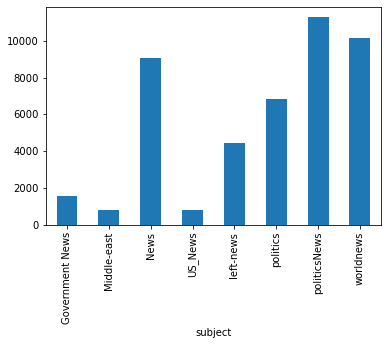

In [57]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
0    23481
1    21417
Name: text, dtype: int64


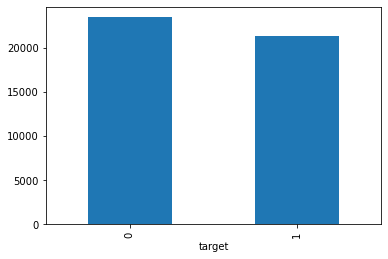

In [58]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

pip install wordcloud

In [59]:
from wordcloud import WordCloud

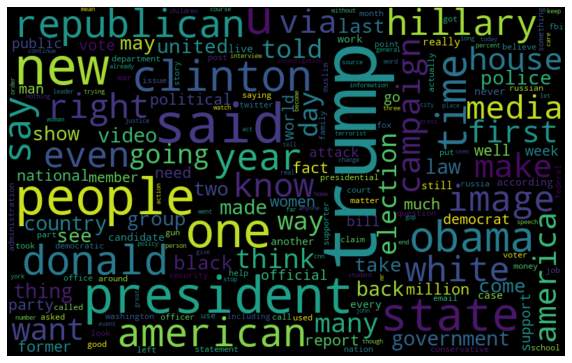

In [60]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == 0]#"fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == 1]#"true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'fake_data' is not defined

In [29]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize, FreqDist

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

In [ ]:
# Most frequent words in fake news
# counter(data[data["target"] == "fake"], "text", 20)
counter(data[data["target"] == 0], "text", 20)

In [ ]:
# Most frequent words in real news
# counter(data[data["target"] == "true"], "text", 20)
counter(data[data["target"] == 1], "text", 20)

## Modeling

In [35]:
from sklearn import metrics
import itertools

In [36]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Peparing the data

In [30]:
X = data['text']
y = data.target

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic regression

In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Random Forest Classifier

In [32]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

cv = CountVectorizer()
X_train_new = cv.fit_transform(X_train)
X_test_new = cv.transform(X_test)

model = RandomForestClassifier(n_estimators=50, criterion="entropy")
model.fit(X_train_new, y_train)
prediction = model.predict(X_test_new)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
cross_val_score(model, X_test_new, y_test, cv=10).mean()

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [191]:
model = DecisionTreeClassifier()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 10),
                                'min_samples_split': range(10, 60, 10),
                                'criterion': ['gini', 'entropy']},
                                cv=3,
                                 n_jobs=1,
                                scoring='neg_mean_squared_error')

gs.fit(X_train_new, y_train)

print(gs.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 20}


### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

cv = CountVectorizer()
X_train_new = cv.fit_transform(X_train)
X_test_new = cv.transform(X_test)

model = DecisionTreeClassifier(criterion= 'gini', max_depth = 9, min_samples_split=20, splitter='best', random_state=42)
model.fit(X_train_new, y_train)
prediction = model.predict(X_test_new)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("Cross Validation Score: ", cross_val_score(model, X_test_new, y_test, cv=10).mean())

accuracy: 99.57%
Cross Validation Score:  0.9935412026726057


# Hyperparameter Tuning

In [155]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

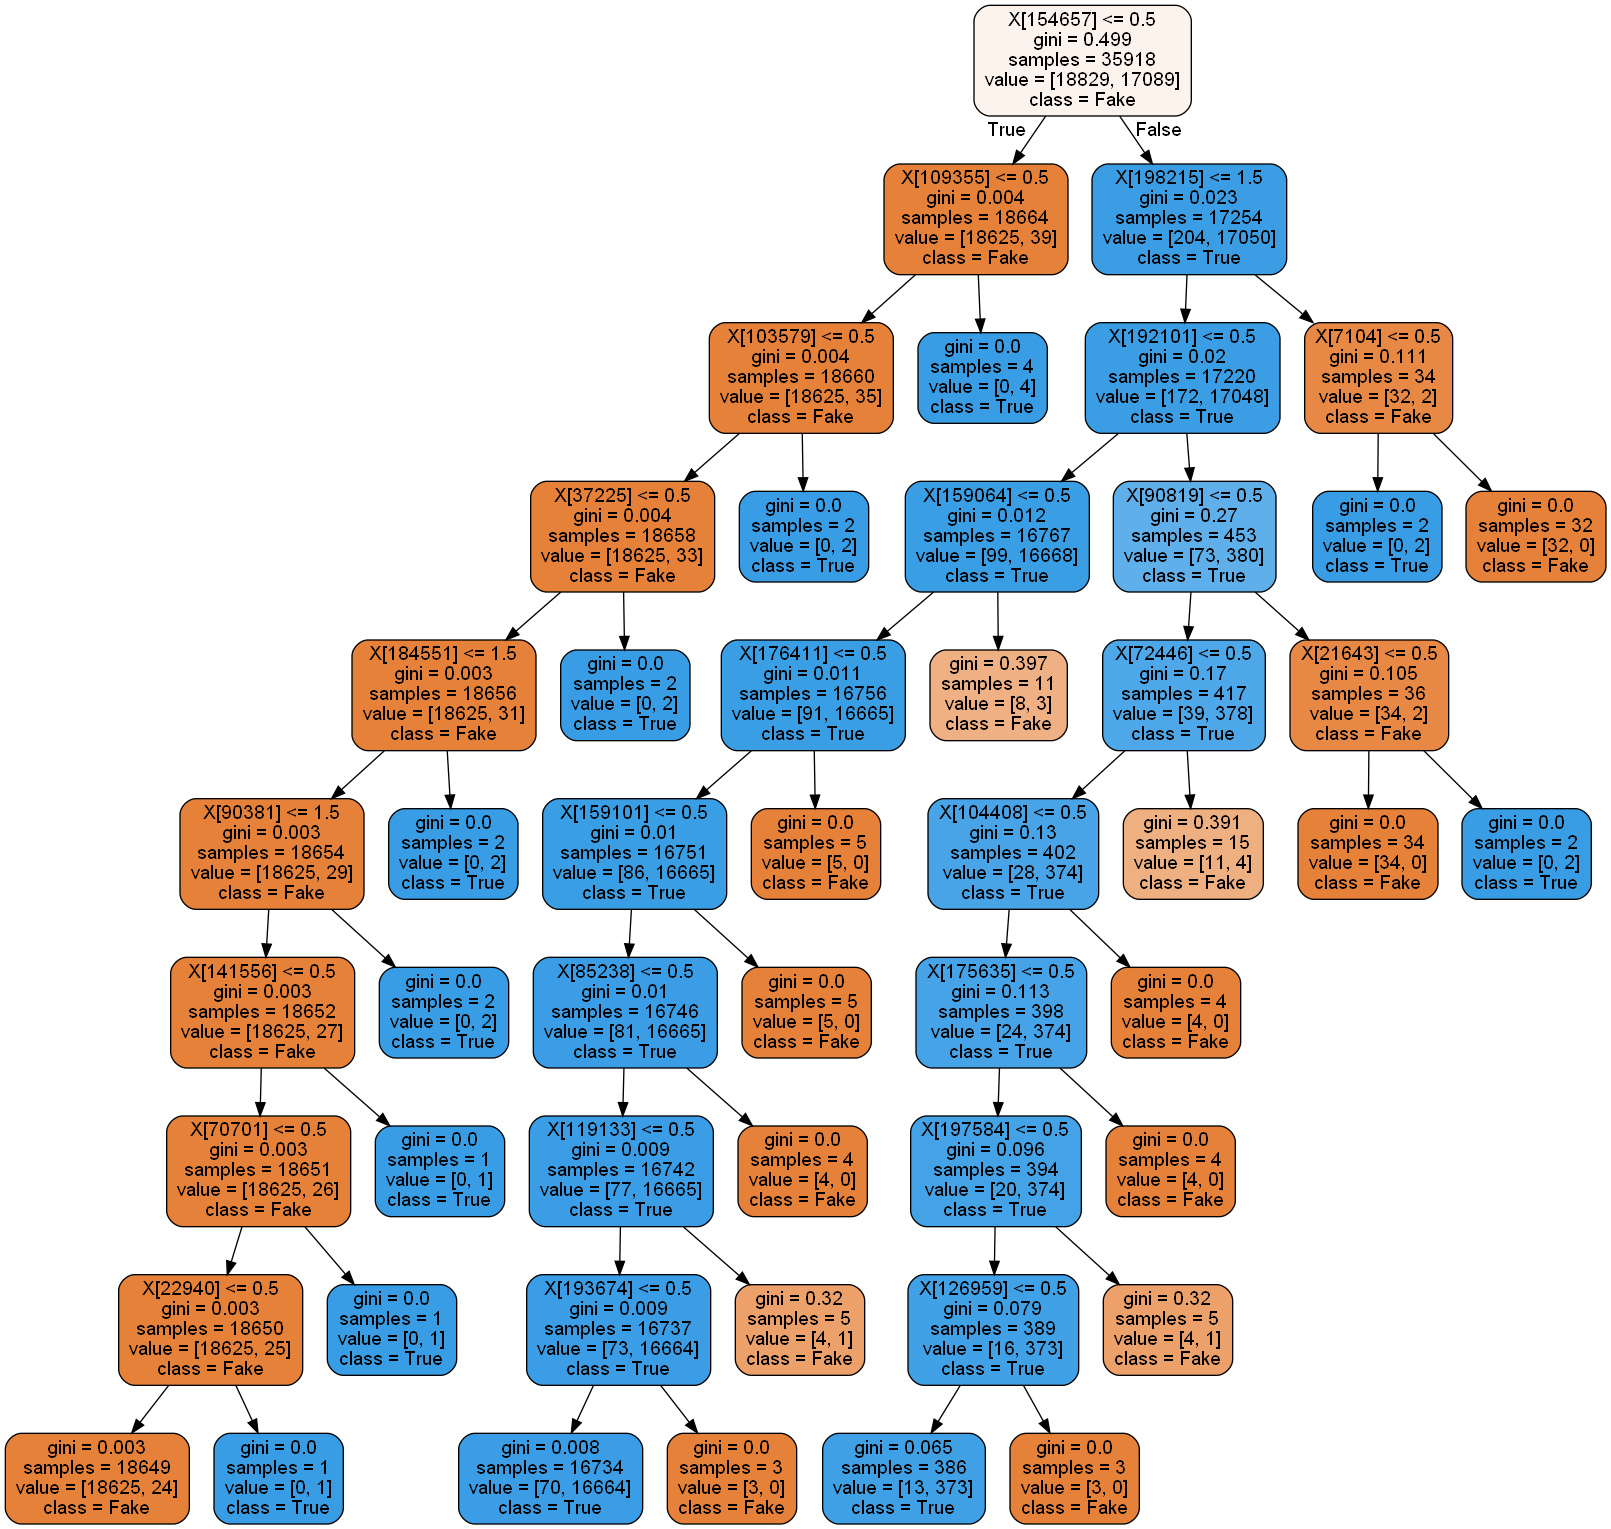

In [194]:
dot_data = StringIO()  

export_graphviz(model, out_file=dot_data, filled=True, rounded=True,
                class_names=['Fake', 'True'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Confusion matrix, without normalization


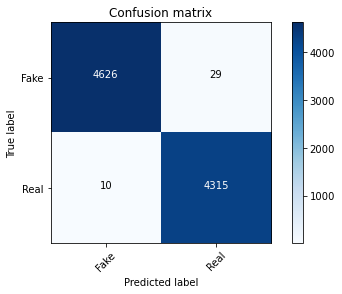

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [195]:
manual_testing_data = pd.read_csv("D:/Fake_news/fake-news2/data/manual_testing.csv")

In [196]:
manual_testing = manual_testing_data['text']
manual_testing = manual_testing.apply(funct) 

# Testing

In [208]:
def Testing(text):
    punctuation_removal(text)
    new_text = cv.transform(text)   
    y_pred = modelReload.predict([text])#model.predict(new_text)
    
    return y_pred

text = str(input())
text = funct(text)

# print("\n", Testing([text])[0])

prediction = Testing([text])

if(prediction[0] == 0):
    print("\nFake News!!\n")
else:
    print("\nTrue News!!\n")
    
# print("\n", Testing(manual_testing))

The Pacific Northwest tree octopus (Octopus paxarbolis) found temperate rainforests Olympic Peninsula west coast North America. Their habitat lies Eastern side Olympic mountain range, adjacent Hood Canal. These solitary cephalopods reach average size (measured arm-tip mantle-tip,) 30-33 cm. Unlike cephalopods, tree octopuses amphibious, spending early life period mating season ancestral aquatic environment. Because moistness rainforests specialized skin adaptations, able keep becoming desiccated prolonged periods time, given chance would prefer resting pooled water. An intelligent inquisitive (it largest brain-to-body ratio mollusk), tree octopus explores arboreal world touch sight. Adaptations ancestors originally evolved three dimensional environment sea put good use spatially complex maze coniferous Olympic rainforests. The challenges richness environment (and intimate way interacts it,) may account tree octopus\'s advanced behavioral development. (Some evolutionary theorists suppos

In [202]:
import joblib

In [203]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [209]:
joblib.dump(cv, 'cv.pkl')

['cv.pkl']